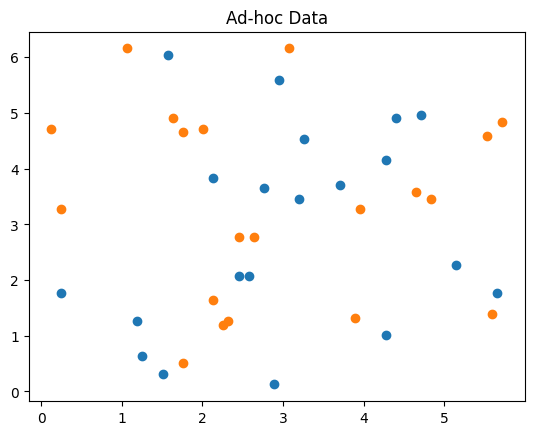

Testing accuracy: 0.95


TypeError: missing a required argument: 'y_pred'

In [4]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_machine_learning.optimizers import COBYLA
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import ad_hoc_data
from sklearn import metrics
import matplotlib.pyplot as plt

feature_dim = 2  # dimension of data points
training_size = 20
test_size = 10

training_features, training_labels, test_features, test_labels = ad_hoc_data(training_size=training_size, 
    test_size=test_size, n=feature_dim, gap=0.3, plot_data = True)

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")
ansatz = TwoLocal(feature_map.num_qubits, ["ry", "rz"], "cz", reps=3)
vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=COBYLA(maxiter=100),)
vqc.fit(training_features, training_labels)

score = vqc.score(test_features, test_labels)
print(f"Testing accuracy: {score:0.2f}")
print("Classification Report:\n %s:" % (metrics.classification_report(score)))